<a href="https://colab.research.google.com/github/Aadhyaaaa2000/E/blob/main/BigQueryExample1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Set Up Your Environment**
First, you need to set up your environment in Google Colab. This includes installing necessary libraries and authenticating your Google Cloud account.

In [ ]:
# Install the Google Cloud BigQuery library
!pip install google-cloud-bigquery

**Step 2: Authenticate Your Google Account**
You need to authenticate your Google account to access BigQuery.

In [ ]:
from google.colab import auth
auth.authenticate_user()

print("Aunthenticated")

# Set up the BigQuery client
from google.cloud import bigquery





Aunthenticated


**Step 3: Query a Public Dataset**
BigQuery has many public datasets that you can explore. For this example, let's query the USA Names dataset, which contains information about names in the US.

In [ ]:
# Define the SQL query
query = """ SELECT name, gender, SUM(number) as total FROM bigquery-public-data.usa_names.usa_1910_2013 GROUP BY name, gender ORDER BY total DESC LIMIT 10 """



#associate with a create project id
project_id = 'tireproject-398602'

#ASSOCIATE bigquery client and the project
client = bigquery.Client(project=project_id)

# Execute the query via the client
query_job = client.query(query)

# Get the result
results = query_job.result()


**Step 4: Load Results into a DataFrame**
For easier data manipulation, load the results into a Pandas DataFrame.

In [ ]:
import pandas as pd

# Convert the query result to a pandas DataFrame
df = results.to_dataframe()

# Display the DataFrame
print(df)


      name gender    total
0    James      M  4924235
1     John      M  4818746
2   Robert      M  4703680
3  Michael      M  4280040
4  William      M  3811998
5     Mary      F  3728041
6    David      M  3541625
7  Richard      M  2526927
8   Joseph      M  2467298
9  Charles      M  2237170


**Step 5: Perform Analysis**
You can now perform further analysis on the DataFrame. For instance, you can plot the data to visualize the most common names.

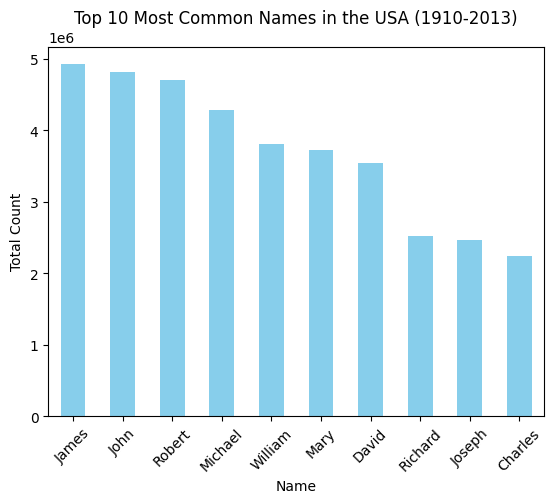

In [ ]:
import matplotlib.pyplot as plt

# Plot the top 10 names
df.plot(kind='bar', x='name', y='total', color='skyblue', legend=None)
plt.title('Top 10 Most Common Names in the USA (1910-2013)')
plt.xlabel('Name')
plt.ylabel('Total Count')
plt.xticks(rotation=45)
plt.show()
